<a href="https://colab.research.google.com/github/Krishnan021/Machine_Learning/blob/main/Promotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [ ]:
Data = pd.read_csv("/content/employee_promotion.csv.zip")
Data.head(70)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,3342,Operations,region_13,Master's & above,f,sourcing,1,31,3.0,3,0,58.0,0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,58.0,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,NaN,1
68,73729,Procurement,region_10,Bachelor's,m,other,1,30,4.0,6,0,75.0,0


In [ ]:
print(Data.shape)

(54808, 13)


In [ ]:
print(Data.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service    awards_won  avg_training_score   is_promoted  
count       54808.000000  54808.000000        52248.000000  54808.000000  
mean            5.865512      0.023172           63.712238      0.085170  
std             4.265094      0.150450           13.521910      0.279137  
min            

## Drop Null Values

In [ ]:
Data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
Data.interpolate(inplace=True)

In [ ]:
Data.dropna(inplace=True)

In [ ]:
Data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
Data.shape

(52399, 13)

In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 98.2 MB/s eta 0:00:00


In [ ]:
# PLotting a Graph in Html Format(Report.html)
import sweetviz as sv
report = sv.analyze(Data)
report.show_html("./report.html")
plt.show()

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


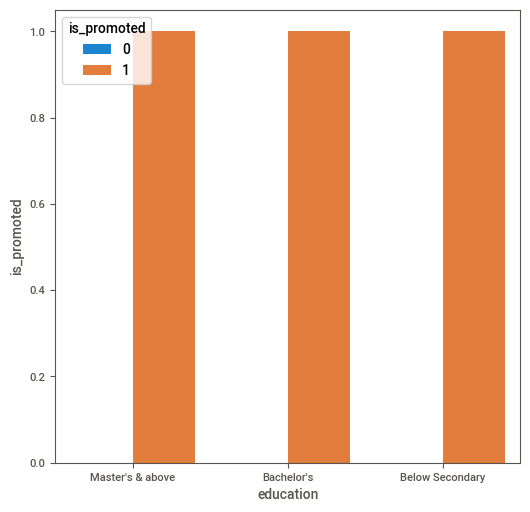

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='education',y='is_promoted',hue='is_promoted',data=Data)
plt.show()


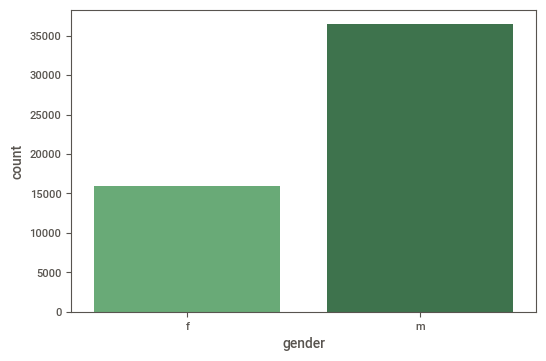

In [ ]:
sns.countplot(x='gender',data=Data,palette='Greens_d')

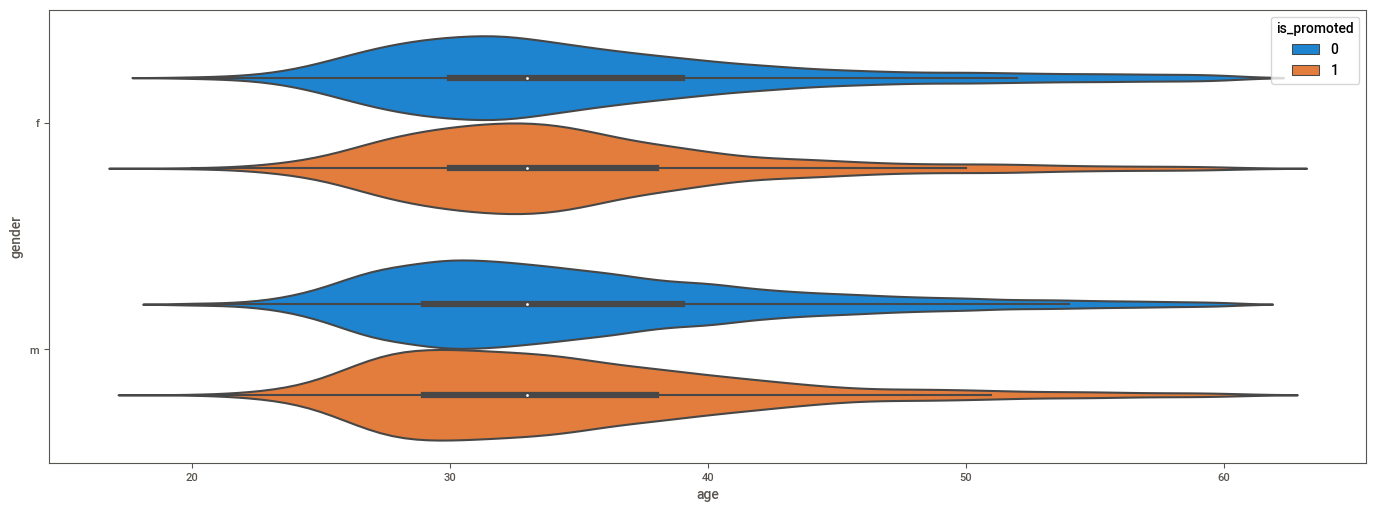

In [ ]:
plt.figure(figsize=(17,6))
sns.violinplot(x='age',y='gender',hue='is_promoted',data=Data)
plt.show()


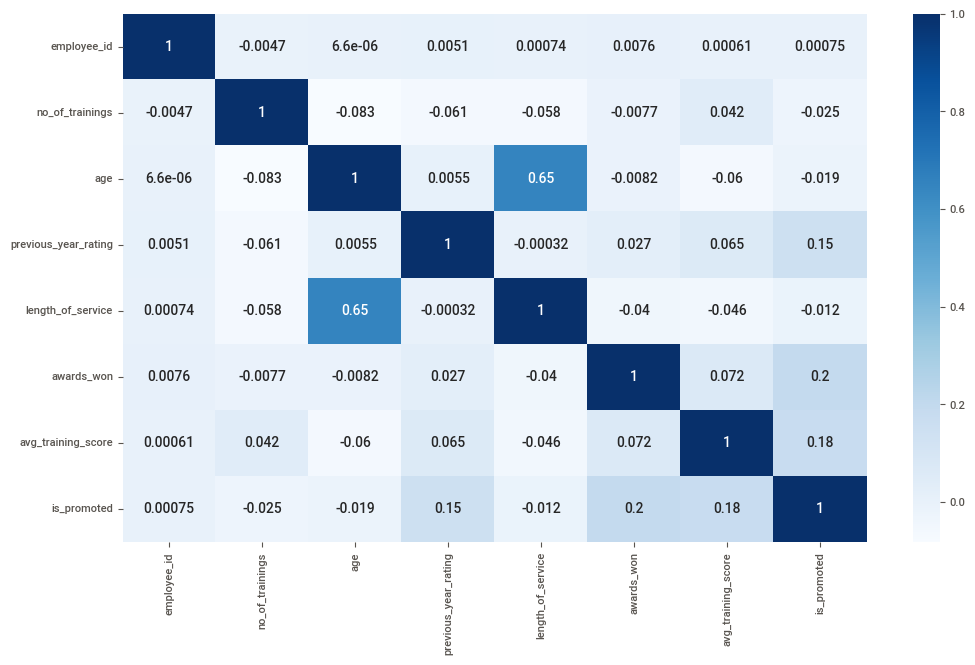

In [ ]:

plt.figure(figsize=(12,7))
sns.heatmap(Data.corr(),annot=True,cmap='Blues')
plt.show()


## Values Used In Alogrithm


In [ ]:
Data.drop('employee_id',axis=1,inplace=True)
Data.drop('region',axis=1,inplace=True)

## Encoding the Values 
## Department = Range(0-8)  Education = Range(0-2) Gender = Range(0-1) Rec_Channel = Range(0-2) Traings = Range(0-9) Age= Range(0-41)  Ratings= Range(0-5)
## Service_Year= Range(0-10)  Award_Won= Range(0-2)


In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in Data.columns:
    if Data[i].dtype == 'object':
        Data[i]=l.fit_transform(Data[i])
Data.head(70)        

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,0,49.0,0
1,4,0,1,0,1,30,5.0,4,0,60.0,0
2,7,0,1,2,1,34,3.0,7,0,50.0,0
3,7,0,1,0,2,39,1.0,10,0,50.0,0
4,8,0,1,0,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,1,0,1,30,3.0,7,0,84.0,1
70,4,0,0,0,1,50,5.0,5,0,59.0,0
71,8,2,1,0,1,34,5.0,7,0,78.0,1
72,7,2,0,2,1,41,1.0,12,0,52.0,0


## Select The Input Values And Output Values 

In [ ]:

x = Data.drop('is_promoted',axis=1)
y = Data['is_promoted']
print(x.shape)
print(y.shape)

(52399, 10)
(52399,)


In [ ]:
def standard(x):
  mu=np.mean(x)
  std=np.std(x)
  sta=(x-mu)/std
  return mu,std,sta

In [ ]:
mu,std,sta=standard(x)
x=sta
x

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,0.821617,1.569829,-1.513667,1.153440,-0.417644,0.002595,1.345666,0.483454,-0.154006,-1.122693
1,-0.378659,-0.649058,0.660647,-0.886492,-0.417644,-0.653667,1.345666,-0.451912,-0.154006,-0.295373
2,0.821617,-0.649058,0.660647,1.153440,-0.417644,-0.128657,-0.272331,0.249613,-0.154006,-1.047482
3,0.821617,-0.649058,0.660647,-0.886492,1.212457,0.527604,-1.890327,0.951137,-0.154006,-1.047482
4,1.221710,-0.649058,0.660647,-0.886492,-0.417644,1.315118,-0.272331,-0.919595,-0.154006,0.682370
...,...,...,...,...,...,...,...,...,...,...
54802,0.821617,-0.649058,0.660647,-0.886492,1.212457,-0.522414,-1.890327,-0.919595,-0.154006,-1.122693
54803,1.221710,-0.649058,0.660647,1.153440,-0.417644,1.708875,-0.272331,2.588028,-0.154006,1.058424
54804,-0.378659,1.569829,-1.513667,-0.886492,-0.417644,0.265100,-1.081329,0.015771,-0.154006,-0.596216
54805,-1.979029,-0.649058,0.660647,-0.886492,-0.417644,-1.047424,1.345666,-0.685753,-0.154006,1.133635


## Spliting The Data For Training And Testing

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)
xtest.shape

(15720, 10)

In [ ]:
from sklearn.linear_model import LinearRegression

## Machine Learning Model


In [ ]:
from sklearn.linear_model import LogisticRegression

models=LogisticRegression()

models.fit(xtrain,ytrain)
    
ypred=models.predict(xtest)
    
print('Model :',models)
print('-----------------------------------------------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
    
print('confusion matrix :',confusion_matrix(ytest,ypred))
print('classification report:\n',classification_report(ytest,ypred))
print('accuracy :',round(accuracy_score(ytest,ypred),2))
print('precision :',round(precision_score(ytest,ypred),2))
print('recall :',round(recall_score(ytest,ypred),2))
print('f1 :',round(f1_score(ytest,ypred),2))
print()


Model : LogisticRegression()
-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[14220    99]
 [ 1273   128]]
classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     14319
           1       0.56      0.09      0.16      1401

    accuracy                           0.91     15720
   macro avg       0.74      0.54      0.56     15720
weighted avg       0.89      0.91      0.88     15720

accuracy : 0.91
precision : 0.56
recall : 0.09
f1 : 0.16



In [ ]:
model=LinearRegression().fit(xtrain,ytrain)
predictions_test=model.predict(xtest)
coefficient=model.coef_
intercept=model.intercept_
print(coefficient,intercept)

[ 1.65794666e-02  7.07170342e-03 -7.12436079e-05  2.40424863e-03
 -7.25858821e-03 -9.58405870e-03  3.98311239e-02  4.47750886e-03
  5.19980312e-02  4.79778329e-02] 0.08775490516516671


In [ ]:
def rmse(predict,actual):
  return np.sqrt(np.meaan(np.square(predict - actual)))

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)
model=LinearRegression().fit(xtrain,ytrain)
predictions_test=model.predict(xtest)
coefficient=model.coef_
intercept=model.intercept_
print(coefficient,intercept)
loss=rmse(predictions_test,ytest)
print('loss:',loss)
print(model.score(xtest,ytest))


[ 0.01619532  0.0083642   0.00019671  0.0010369  -0.00764455 -0.00878175
  0.03911226  0.0038194   0.05119389  0.04689275] 0.08681595746581988


AttributeError: ignored

## Mannual Calculation of Logistic Regression


In [ ]:
def logistic_binary(x):
    if model(x*theta[1]+theta[0])<0.5:
        return iris.target_names[0]
    else:
        return iris.target_names[1]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e100)
X[:,1].shape, y.shape

In [ ]:
lr = lr.fit(X[:,1].reshape(-1,1),y.ravel())

In [ ]:
'Theta_0 and Theta_1 are {},{}'.format(lr.intercept_[0], lr.coef_[0,0])

In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Graphical User Interface By Gradio

In [ ]:
import gradio as gr

def promotion(department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score):
  x=np.array([department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score])
  y=np.linspace([department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score])
 
  ypred=models.predict(x.reshape(1,-1))
  if ypred ==1:
    return "Promoted"
  else :
    return "Not_Promoted"


In [ ]:
outputs=gr.outputs.Textbox()
app=gr.Interface(fn=promotion,inputs=['number','number','number','number','number','number','number','number',
                                      'number','number'],outputs=outputs,description="Employee Promotion Prediction")


In [ ]:
app.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>